In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix

%matplotlib inline
np.random.seed(42)

data = pd.read_csv("./fashionmnist/fashion-mnist_train.csv")

## Lecture des données 

In [42]:
# recupération des données
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [43]:
# fonction d'affichage des images
def plot_data(centers,vmin,vmax):
    f, axarr = plt.subplots(1,centers.shape[0], sharex=True,sharey=True)
    for i in range(centers.shape[0]):
        axarr[i].imshow(centers[i,].reshape([28,28]),cmap='Greys',clim=(vmin, vmax),interpolation='nearest')
        axarr[i].set(aspect='equal')
        axarr[i].get_xaxis().set_visible(False)
        axarr[i].get_yaxis().set_visible(False)

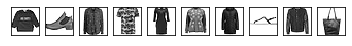

In [44]:
# les 10 premières images
plot_data(X[0:10,],0,255)

In [45]:
# les labels associés
y

array([2, 9, 6, ..., 8, 8, 7])

In [46]:
# creation d'une fonction permetant de passer d'une représentation numéro a une représentation binaire 
# ex : 2 -> [0,1,0,0,...]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(y.reshape(-1,1))

OneHotEncoder()

In [47]:
# separation du jeu de données en train / test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# creation d'un scaller permttant de centrer scaler les images
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_centered = scaler.transform(np.array(X_train,np.float))
X_test_centered  = scaler.transform(np.array(X_test,np.float))

In [49]:
# passage des y en représentation binaire
Ybin_train = enc.transform(y_train.reshape(-1,1)).todense()
Ybin_test = enc.transform(y_test.reshape(-1,1)).todense()

## MLP entrée = vecteurs centré -réduit 

In [50]:
# definition d'un mlp avec keras
from keras.layers import Layer,Input, Dense
from keras.models import Model


inputs = Input(shape=(X.shape[1],)) 

hidden = Dense(32,activation='relu')(inputs)

outputs = Dense(10, activation='softmax')(hidden)

model1 = Model(inputs,outputs)

In [51]:
# compilation du model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# apprentissage
nbepoch = 15
hist = model1.fit(X_train_centered,Ybin_train,batch_size=20,epochs=nbepoch,validation_data=(X_test_centered,Ybin_test))

Epoch 1/15
2100/2100 [==============================] - 2s 814us/step - loss: 0.4907 - accuracy: 0.8255 - val_loss: 0.4113 - val_accuracy: 0.8534
Epoch 2/15
2100/2100 [==============================] - 2s 770us/step - loss: 0.3749 - accuracy: 0.8656 - val_loss: 0.3933 - val_accuracy: 0.8591
Epoch 3/15
2100/2100 [==============================] - 2s 774us/step - loss: 0.3373 - accuracy: 0.8771 - val_loss: 0.3606 - val_accuracy: 0.8756
Epoch 4/15
2100/2100 [==============================] - 2s 804us/step - loss: 0.3150 - accuracy: 0.8835 - val_loss: 0.3665 - val_accuracy: 0.8708
Epoch 5/15
2100/2100 [==============================] - 2s 792us/step - loss: 0.2972 - accuracy: 0.8913 - val_loss: 0.3658 - val_accuracy: 0.8752
Epoch 6/15
2100/2100 [==============================] - 2s 796us/step - loss: 0.2822 - accuracy: 0.8957 - val_loss: 0.3837 - val_accuracy: 0.8704
Epoch 7/15
2100/2100 [==============================] - 2s 797us/step - loss: 0.2693 - accuracy: 0.8995 - val_loss: 0.3752 -

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,8)

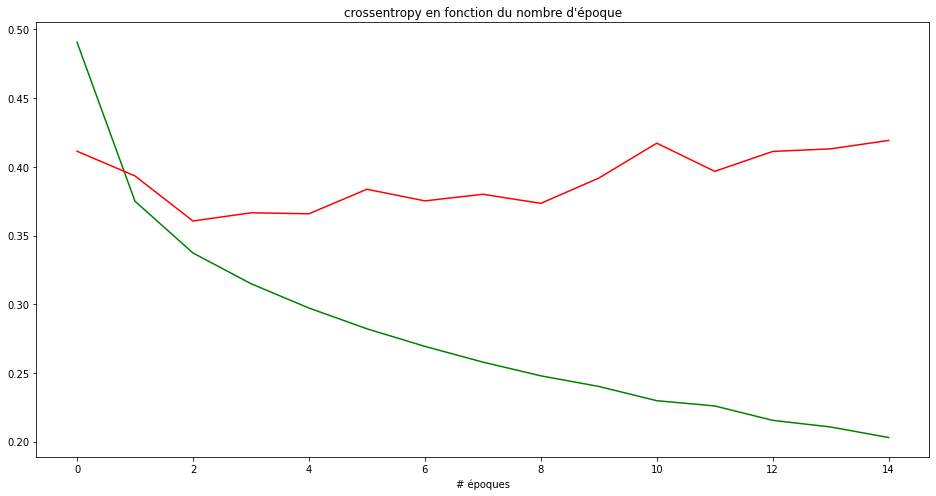

In [54]:
# affichage des résultat de l'apprentissage en terme de cross_entropy
h=plt.plot(range(nbepoch),hist.history["loss"],'-g',label='Train loss')
h=plt.plot(range(nbepoch),hist.history["val_loss"],'-r',label='Test loss')
h=plt.title(u"crossentropy en fonction du nombre d'époque")
h=plt.xlabel(u"# époques")

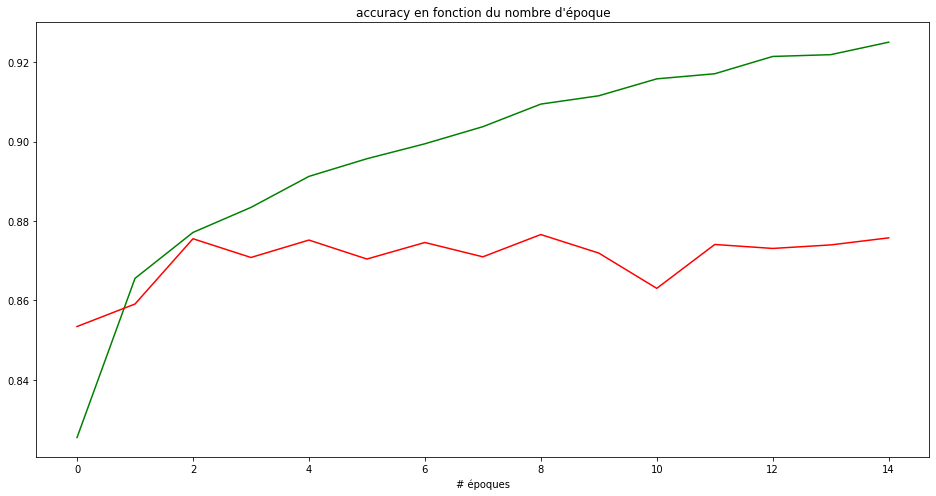

In [55]:
# affichage des résultat de l'apprentissage en terme d'accuracy
h=plt.plot(range(nbepoch),hist.history["accuracy"],'-g',label='Train accuracy')
h=plt.plot(range(nbepoch),hist.history["val_accuracy"],'-r',label='Test accuracy')
h=plt.title(u"accuracy en fonction du nombre d'époque")
h=plt.xlabel(u"# époques")

## ConvNN entrée = images

In [56]:
# mise en forme des données sous forme d'image 
Xim_train=X_train.reshape(X_train.shape[0],28,28,1)
Xim_test=X_test.reshape(X_test.shape[0],28,28,1)

In [57]:
from keras.layers import BatchNormalization,Conv2D,Flatten,MaxPooling2D,Dropout

inputs = Input(shape=(Xim_train.shape[1],Xim_train.shape[2],1))

inn = BatchNormalization()(inputs)

conv1 = Conv2D(64, (4, 4),  activation='relu')(inn)

p1 = MaxPooling2D(pool_size=(2, 2))(conv1)

d1 = Dropout(0.2)(p1)

conv2 = Conv2D(64, (4, 4),  activation='relu')(d1)

p2 = MaxPooling2D(pool_size=(2, 2))(conv2)

d2 = Dropout(0.1)(p2)

ifl = Flatten()(d2)

hidden1 = Dense(100,activation='relu')(ifl)

hd1 = Dropout(0.1)(hidden1)

hidden2 = Dense(30,activation='relu')(hd1)

hd2 = Dropout(0.1)(hidden2)

outputs = Dense(10, activation='softmax')(hd2)

model2 = Model(inputs,outputs)


In [58]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
nbepoch = 10
hist = model2.fit(Xim_train,Ybin_train,batch_size=20,epochs=nbepoch,validation_data=(Xim_test,Ybin_test))

Epoch 1/10
2100/2100 [==============================] - 20s 9ms/step - loss: 0.5824 - accuracy: 0.7912 - val_loss: 0.3850 - val_accuracy: 0.8602
Epoch 2/10
2100/2100 [==============================] - 20s 9ms/step - loss: 0.3931 - accuracy: 0.8577 - val_loss: 0.3442 - val_accuracy: 0.8766
Epoch 3/10
2100/2100 [==============================] - 19s 9ms/step - loss: 0.3514 - accuracy: 0.8737 - val_loss: 0.2972 - val_accuracy: 0.8928
Epoch 4/10
2100/2100 [==============================] - 20s 9ms/step - loss: 0.3205 - accuracy: 0.8838 - val_loss: 0.2947 - val_accuracy: 0.8929
Epoch 5/10
2100/2100 [==============================] - 19s 9ms/step - loss: 0.2976 - accuracy: 0.8910 - val_loss: 0.2925 - val_accuracy: 0.8917
Epoch 6/10
2100/2100 [==============================] - 19s 9ms/step - loss: 0.2827 - accuracy: 0.8974 - val_loss: 0.2790 - val_accuracy: 0.8970
Epoch 7/10
2100/2100 [==============================] - 19s 9ms/step - loss: 0.2668 - accuracy: 0.8990 - val_loss: 0.2926 - val_ac

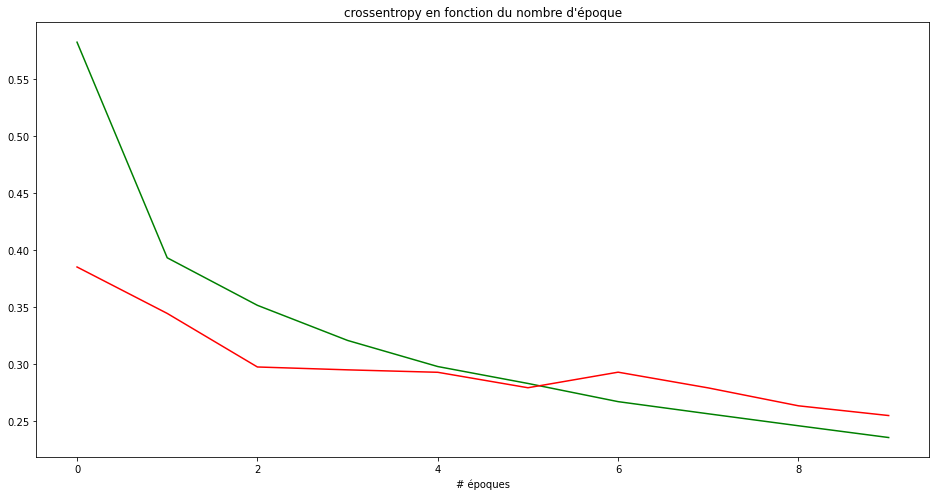

In [60]:
h=plt.plot(range(nbepoch),hist.history["loss"],'-g',label='Train loss')
h=plt.plot(range(nbepoch),hist.history["val_loss"],'-r',label='Test loss')
h=plt.title(u"crossentropy en fonction du nombre d'époque")
h=plt.xlabel(u"# époques")

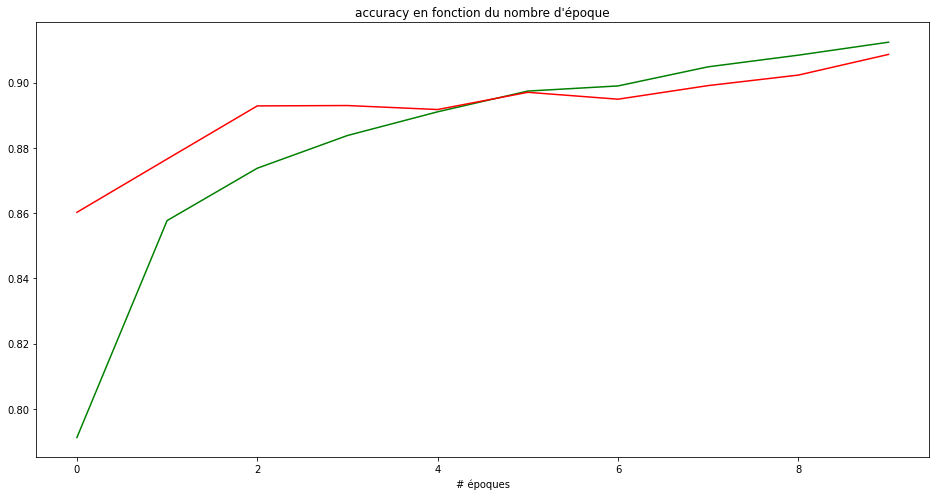

In [61]:
h=plt.plot(range(nbepoch),hist.history["accuracy"],'-g',label='Train accuracy')
h=plt.plot(range(nbepoch),hist.history["val_accuracy"],'-r',label='Test accuracy')
h=plt.title(u"accuracy en fonction du nombre d'époque")
h=plt.xlabel(u"# époques")

In [62]:
# performances sur les données de test ?
evaluation = model2.evaluate(Xim_test,Ybin_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.2546 - accuracy: 0.9086


In [63]:
evaluation

[0.25455421209335327, 0.9086111187934875]

# Questions
## 1) Essayez différentes architectures de réseau et comparer les résultats
## 2) Faites varier les paramètre de l'optimisation et comparer les résultats
## 3) Essayez de construire et d'estimer un auto-encoder a 3 couches cachées [15,2,15] [relu,lin,relu] et visualiser le résultats de la projection. en coloriant les points suivant leurs classes